#### 相关系数

相关系数用于衡量两个变量之间的线性相关程度，它的值在-1到1之间。正的系数表示变量之间直接相关，即当一个变量增加时，另一个变量也增加；负的系数表示变量之间是呈反比的，即一个变量增大时，另一个变量则减小；相关系数越接近0，则变量间的线性相关性越弱。

两个数列 $X$ 和 $Y$ 的相关系数定义为：

$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$
其中 $Cov$ 是协方差，$std$ 是标准差。

两个随机数组的相关系数接近于0。

#### 相关性 vs. 协方差

相关性只是协方差的标准化形式（标准化能够将数据范围限制在规定边界内，例如协方差经过标准化后范围限制在-1到1之间），除此以外它们在其他方面是相同的，日常使用中它们经常互换使用。在当谈及这两个变量时，要能够精确地从名称上加以区分，但在概念上它们几乎相同。

#### 协方差本身并没有太大意义

假设有两个变量 $X$ 和 $Y$，我们来计算它们的协方差。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

print(np.cov(X, Y)[0, 1])

0.160259155508


那么为何说协方差本身没有太大意义呢？我们来看一下相关性的定义就知道了。相关性使用变量 $X$ 和 $Y$ 的方差，来对协方差进行标准化度量。一旦我们将它标准化到-1到1的尺度，我们就可以做出有意义的声明并进行相关性的比较。具体实现公式如下：

$$\frac{Cov(X, Y)}{std(X)std(Y)}$$

$$= \frac{Cov(X, Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$$

$$= \frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$
为了理解这一点，让我们对比一下两个数列的相关性和协方差。

In [7]:
X = np.random.rand(50)
Y = 2 * X + 4

print 'X 和 Y 的协方差: \n' + str(np.cov(X, Y))
print 'X 和 Y 的相关性: \n' + str(np.corrcoef(X, Y))

X 和 Y 的协方差: 
[[ 0.06833833  0.13667667]
 [ 0.13667667  0.27335333]]
X 和 Y 的相关性: 
[[ 1.  1.]
 [ 1.  1.]]


#### 为何 `np.cov` 和 `np.corrcoef` 返回的都是矩阵？

协方差矩阵在统计领域是很重要的一个概念。通常人们提到两个变量 $X$ 和 $Y$ 的协方差，实际上只是 $X$ 和 $Y$ 协方差矩阵的其中一项。对于每个输入型变量，都对应有一行一列。对角线表示这个变量的方差，也即$Cov(X, X)$，对角线以外的项代表了变量与其他不同变量之间的协方差。这个矩阵是沿对角线对称的。让我们来验证一下这是否正确。

In [15]:
cov_matrix = np.cov(X, Y)

# 我们需要手动将变量X的自由度设置为1, 由于Numpy中默认将方差的自由度设置成了0
# 这通常是没问题的，但和自由度设置为1相比存在轻微的误差。
# 当由度设置为1后，通过协方差函数得到的对角线项，与通过方差函数计算的值没有误差（-17次方忽略不计）
error = cov_matrix[0, 0] - X.var(ddof=1)
print 'error: ' + str(error)

error: 1.38777878078e-17


两组随机数的相关系数接近于0

相关性: 0.12188517256
Numpy函数内建的相关性: 0.119447469109


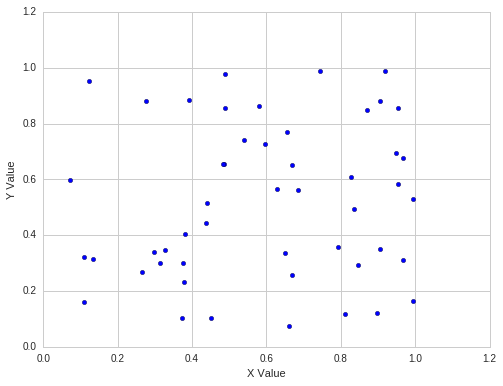

In [22]:
X = np.random.rand(50)
Y = np.random.rand(50)
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# 从np.cov返回的矩阵中取相关值
print '相关性: ' + str(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y)))
# 我们是用内建的相关性函数来计算相关性
print 'Numpy函数内建的相关性: ' + str(np.corrcoef(X, Y)[0, 1])

让我们再看看两个相关的数据集的情况：

相关性: 0.945308206099


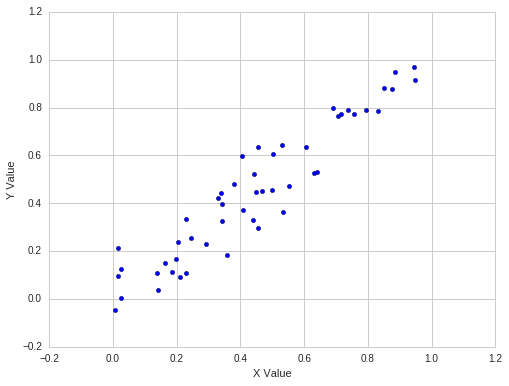

In [21]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print '相关性: ' + str(np.corrcoef(X, Y)[0, 1])

*自由度的相关拓展：*

*观察样本方差的表达式，你会发现样本均值$\bar{X}$这一项包含在内： $$\frac{1}{N - ddof} \sum^N_{i=1} \left( X_i - \bar{X} \right)^2 $$*
*在统计学中，自由度是指在统计计算中可以自由变换的值的数量。简单来说，如果有$n$个样本。 样本均值是已知的，那么原本的 $n$ 个自由度，其中一个被分配用来计算样本均值，因此只剩下$n-1$个自由度（只有$n-1$个样本的值可以变化）。*

*例如，假设有3个样本$X_1、X_2、X_3$，它们由于随机性取值不定。但我们已知样本均值$\bar{X}=5$，那么每选取一组$X_1、X_2$的取值，$X_3$将不得不等于$15-X_1-X_2$。对于$X_3$来说，这种“不得不”就可以理解为被剥夺了自由度。所以就这个例子而言，3个样本最终"自由"的只有其中的2个。更一般的情况，$n$个样本，留出一个自由度给固定的均值，剩下的自由度即为$n-1$。*


让我们引入更多“噪点”来调低变量间的相关性

相关性: 0.791427500822


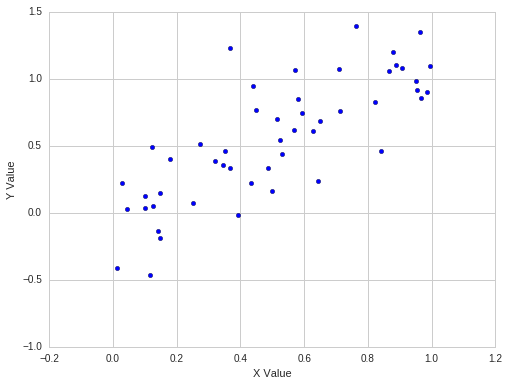

In [25]:
X = np.random.rand(50)
Y = X + np.random.normal(0, .3, 50)
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print '相关性: ' + str(np.corrcoef(X, Y)[0, 1])

最后我们来看一下变量间成反比关系的情况

相关性: -0.967168827775


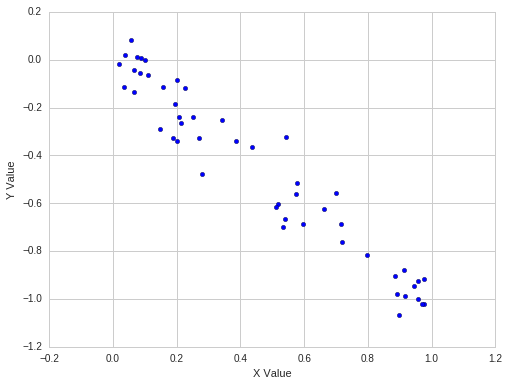

In [26]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)
plt.figure(figsize=(8, 6))
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print '相关性: ' + str(np.corrcoef(X, Y)[0, 1])

#### 相关性分析在金融领域中的应用

#### 确定相关性资产

一旦我们确定了两个数列可能相关，我们就可以利用它来预测数列的未来值。让我们来看一下苹果和半导体设备制造商泛林公司的股价。

相关系数:
LRCX 和 AAPL:  0.959496455456
LRCX 和 SPY:  0.939070440627
AAPL 和 SPY:  0.907839467895
[[ 1.          0.93907044  0.90783947]
 [ 0.93907044  1.          0.95949646]
 [ 0.90783947  0.95949646  1.        ]]


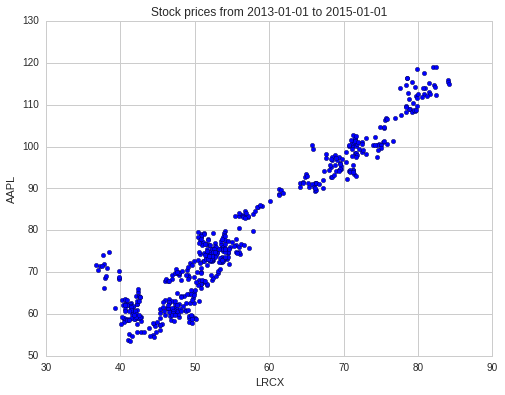

In [4]:
# 获取两只股票以及标普500的数列
start = '2013-01-01'
end = '2015-01-01'
bench=get_pricing('SPY',fields='price',start_date=start,end_date=end)
a1=get_pricing('LRCX',fields='price',start_date=start,end_date=end)
a2=get_pricing('AAPL',fields='price',start_date=start,end_date=end)
data = [bench,a1,a2]

plt.figure(figsize=(8, 6))
plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print "相关系数:"
print "LRCX 和 AAPL: ", np.corrcoef(a1,a2)[0,1]
print "LRCX 和 SPY: ", np.corrcoef(a1,bench)[0,1]
print "AAPL 和 SPY: ", np.corrcoef(bench,a2)[0,1]

print str(np.corrcoef(data))

#### 构建一个不相关资产的投资组合

相关性在金融领域另一个重要的应用是不相关的资产能够产生最佳的投资组合。直接告诉我们如果资产之间是不相关的，一个资产的缩水不会影响到其他的资产。这意味着一个由许多不相关资产组成的投资组合，拥有非常稳定的回报。

#### 相关性的局限

#### 显著性

当变量不是正态分布的，很难严格界定相关性是否显著。当苹果和泛林这两只股票的相关系数接近1时，可以说在我们选取的时间范围内，它们的价格是相关的，但这是否能预示着未来依然相关呢？

如果我们分别检验这两只股票与标普500的相关性，也会发现存在强相关性。并且和平均股价（标普500）的相比，苹果和泛林之间的相关性还要略高。

一个根本问题在于：通过选择合适的时间段，能够很容易挖掘到相关的数据。为了避免这种情况，一种方法是计算这两个量在以往多个历史时期的相关性，并检查相关系数的分布情况。关于单点估计为何不足够好（点估计是用样本统计量来估计总体参数，点估计得到未知参数的估计值，但是未给出估计值的可靠程度），更多细节将在未来的章节进一步介绍。

正如上例中看到的，苹果和泛林在 2013-1-1 到 2015-1-1这个时间段内的相关系数是0.95。让我们看一下这两只股票60天滚动相关性，看看它是如何变化的。

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


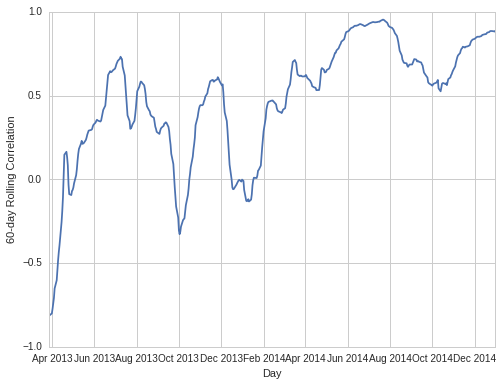

In [5]:
rolling_correlation = pd.rolling_corr(a1, a2, 60)
plt.figure(figsize=(8,6))
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

#### 非线性关系

相关系数能够用来检测两个变量间的关系强度。然而牢记，两个变量可能以一种非线性但可预测的方式相互关联，本章节中将不会采用这种方式。例如，一个变量可能牢牢跟随第二个变量的行为，但有延迟。有一些技术可以处理这种滞后的相关性。又或者是，一个变量可能与另一个变量的变化率相关。这两种关系都不是线性的，但是如果被检测到，可能会是非常有用的。

此外，相关系数对极值也是非常敏感的。这意味着包含或者排除这些值可能会改变结果。并且，这些极值本身是有意义的，又或是纯粹的噪声，也很难界定。

举个例子，我们使噪声服从泊松分布而非正态分布，来看看会发生什么？

0.29147687487638713

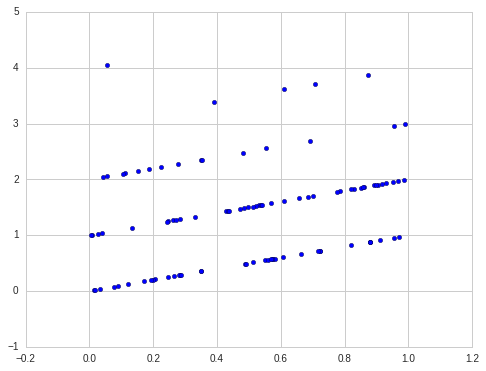

In [7]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)
plt.figure(figsize=(8,6))
plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

总结一下：相关性是一种强大的技术，但在统计中，应该警惕不要去解释那些无中生有的结果。